In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Loads the company dataset from a CSV file into a dataframe called df

In [4]:
df = pd.read_csv("Inventory_Waste_CompanyData (1).csv")

Turns text categories into numbers and creates the 0/1 target label

In [5]:
df['Material_Num'] = df['Material Type'].map({'GI': 0, 'PI': 1})
df['High_Waste_Risk'] = (df['Waste Percentage'] > 0.10).astype(int)

Defines inputs X and output y, then splits into 80% train and 20% test.

In [6]:
X = df[['Material_Num', 'Area (sq/m)', 'Thickness (mm)']]
y = df['High_Waste_Risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scales Area and Thickness using mean=0 and std=1 based on the training set only.


In [7]:
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_train_scaled[['Area (sq/m)', 'Thickness (mm)']] = scaler.fit_transform(X_train[['Area (sq/m)', 'Thickness (mm)']])

X_test_scaled = X_test.copy()
X_test_scaled[['Area (sq/m)', 'Thickness (mm)']] = scaler.transform(X_test[['Area (sq/m)', 'Thickness (mm)']])

Trains the Logistic Regression model (learns the weights).

In [8]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

Tests on unseen data and prints accuracy, confusion matrix, and precision/recall/F1.


--- FINAL REALISTIC LOGISTIC REGRESSION ---
Accuracy: 94.00%

Confusion Matrix 
[[176   7]
 [ 17 200]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       183
           1       0.97      0.92      0.94       217

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



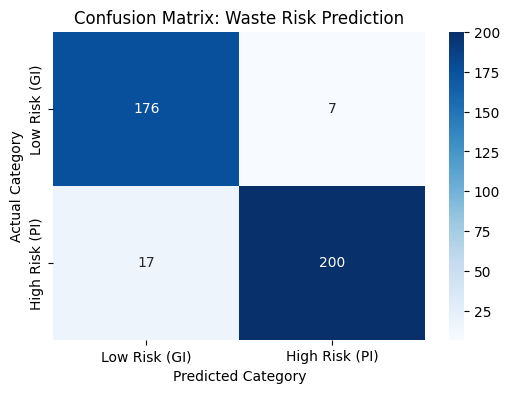

In [9]:
y_pred = model.predict(X_test_scaled)

print("--- FINAL REALISTIC LOGISTIC REGRESSION ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")

print("\nConfusion Matrix ")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Risk (GI)', 'High Risk (PI)'],
            yticklabels=['Low Risk (GI)', 'High Risk (PI)'])
plt.title('Confusion Matrix: Waste Risk Prediction')
plt.ylabel('Actual Category')
plt.xlabel('Predicted Category')
plt.show()